# Exploratory Data Analysis

### Importing the required python Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as mtick


### Mounting the Drive


In [115]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


Reading csv file

In [116]:
loan = pd.read_csv("/content/gdrive/My Drive/MS/Lending_club/loan.csv", encoding = "ISO-8859-1", low_memory=False)
#loan = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)

Lets see the shape and few rows of dataframe `loan` to get the idea of the data we have

In [117]:
loan.shape

(39717, 111)

In [118]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [119]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

### Data Cleaning

Now lets see the percentage of missing values in `loan` dataframe 


In [120]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

We see that there are few columns which are 100% empty.
Lets print only thise columns.

In [121]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing == 100]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


We see that there are a lot of column s with 100% empty data. We'll create a list of these columns and drop them from our `loan`  dataframe

In [122]:
columns_with_missing_values = list(missing[missing == 100].index)

len(columns_with_missing_values)

54

In [123]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 57)

Lets re check the percentage of missing values in the `loan` dataframe

In [124]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

We see that there are few columns that have more than 50% empty data. So we'll drop any column that has more than 50% empty data

In [125]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

3

In [126]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

Lets re check the percentage of missing values in the `loan` dataframe

In [127]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Here the `desc` colomn gives the Loan description provided by the borrower, and the `title` column gives the loan title provided by the borrower
So we'll remove the `desc` column as an equivalent short and consise information is present in the purpose and `title` column of the data.


In [128]:
loan = loan.drop('desc',axis=1)

Now lets see the no.of unique values present in the remaining columns 

In [129]:
print("unique values of emp_title : %d"  % len(loan.emp_title.unique()))
print("unique values of emp_length : %d"  % len(loan.emp_length.unique()))
print("unique values of title : %d"  % len(loan.title.unique()))
print("unique values of revol_util : %d"  % len(loan.revol_util.unique()))
print("unique values of last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique values of last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique values of collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique values of chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique values of pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique values of tax_liens : %d"  % len(loan.tax_liens.unique()))

unique values of emp_title : 28821
unique values of emp_length : 12
unique values of title : 19616
unique values of revol_util : 1090
unique values of last_pymnt_d : 102
unique values of last_credit_pull_d : 107
unique values of collections_12_mths_ex_med : 2
unique values of chargeoff_within_12_mths : 2
unique values of pub_rec_bankruptcies : 4
unique values of tax_liens : 2


Columns `emp_length`, `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `pub_rec_bankruptcies` and `tax_liens` are clearly Categorical with values belonging to a range.
Let's see all the different values of these Categorical columns


In [130]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [131]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [132]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [133]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [134]:
loan.tax_liens.unique()

array([ 0., nan])

The columns `collections_12_mths_ex_med`, `chargeoff_within_12_mths` and `tax_liens` has either value of 0 or nan.  
There will be no impact to the analysis with this data.
We can drop these columns for analysis.



In [135]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [136]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

`pub_rec_bankruptcies` can be seen to have taking values like [0,1,2]. 
We can see 37339 records with 0 record of bankrupcies, 1674 records having one bankrupcies case and 7 records with two bankrupcies case.
By taking mode we can impute with 0 bankrupcies to the missing values. But, its better to remove the rows instead so that we ensure we dont add any bais to the data.



In [137]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

Lets check the percentage of missing values in the `loan` dataframe

In [138]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, the columns `emp_title`, `emp_length` have 6.19% and 2.75% missing value. 
`emp_length` gives the Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
`emp_title` gives the The job title supplied by the Borrower when applying for the loan.
Let's remove the rows with nan/blank values for these varaibles.


In [139]:

loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [140]:
loan.shape

(36548, 50)

check the percentage of missing values in the `loan` dataframe

In [141]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Finally we have 3 columns `title`, `revol_util` and `last_pymnt_d`. There is a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.

`title` column gives the loan title provided by the borrower.

`revol_util` column gives the Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

`last_pymnt_d` column gives the Last month payment was received.
Let's again remove the rows with null value for these variables.


In [142]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [143]:
loan.shape

(36433, 50)

In [144]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

Now we have a very clean data with 36433 records and 50 attributes. 

Let's write it into another file and use that file for further analysis.


In [145]:
loan.to_csv('cleaned_loan.csv', encoding='utf-8', index=False)

In [146]:
cleaned_loan = pd.read_csv('cleaned_loan.csv',encoding='utf-8')

Lets see the number of unique values in our `cleaned_loan` dataframe

In [147]:
cleaned_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

#### After understanding these 50 columns using Data_Dictionary file and the data. We can see there are few columns having a single unique value or all unique values. 

These may have nothing much to contribute to the analysis.

id :is a random number given to the loan, does not contribute to analysis

member_id :is a random number given to the member, does not contribute to analysis

pymnt_plan :value for entire dataset is 'n', therefore can be removed.

url : is a URL for LC page for corresponding to each memberid, nothing to do with loan default.

zip_code :first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis

initial_list_status : value for entire dataset is 'f' out of the possible values, therefore can be removed.

policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.

application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.

acc_now_delinq : value for entire dataset is '0', therefore can be removed.

delinq_amnt :value for entire dataset is '0', therefore can be removed.

funded_amnt :value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.

funded_amnt_inv : value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

In [148]:
columns_to_remove = ['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan','url','member_id','id','zip_code','funded_amnt','funded_amnt_inv']
cleaned_loan = cleaned_loan.drop(columns_to_remove, axis=1)

In [149]:
cleaned_loan.shape

(36433, 38)

In [150]:
cleaned_loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
loan_amnt                    863
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc                  4924
total_rec_prncp             7254
installmen

In [151]:
cleaned_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [152]:
cleaned_loan.int_rate.head()

0    15.27%
1    13.49%
2    12.69%
3     7.90%
4    15.96%
Name: int_rate, dtype: object

In [153]:
cleaned_loan.revol_util.head()

0     9.40%
1       21%
2    53.90%
3    28.30%
4    85.60%
Name: revol_util, dtype: object

Here we can see the % symbol and its in Object type. Removing the % and maing it as float


In [154]:
cleaned_loan.int_rate = cleaned_loan.int_rate.str.strip("%").astype("float")
cleaned_loan.revol_util = cleaned_loan.revol_util.str.strip("%").astype("float")

In [155]:
cleaned_loan.total_pymnt.value_counts()

11196.569430    26
11784.232230    16
13148.137860    15
5478.387981     13
10956.775960    13
                ..
10417.384800     1
14040.768530     1
8954.809409      1
4561.076763      1
4608.000000      1
Name: total_pymnt, Length: 34802, dtype: int64

There are some data with more than 2 decimal values. So, rounding off those data.


In [156]:
cleaned_loan.total_pymnt_inv.value_counts()

0.00        134
13148.14     14
6514.52      13
11196.57     12
5478.39      12
           ... 
25433.98      1
17678.14      1
13785.89      1
12251.54      1
4608.00       1
Name: total_pymnt_inv, Length: 34524, dtype: int64

In [157]:
cleaned_loan.total_rec_late_fee.value_counts()

0.000000     34618
15.000000      224
30.000000       51
15.000000       49
15.000000       42
             ...  
14.971231        1
52.840000        1
14.997547        1
33.483779        1
17.165009        1
Name: total_rec_late_fee, Length: 1194, dtype: int64

In [158]:
cleaned_loan.collection_recovery_fee.value_counts()

0.0000      33100
1.2000         10
2.0000          9
1.6900          8
0.8000          8
            ...  
9.6738          1
33.2896         1
6.9239          1
340.0000        1
258.9138        1
Name: collection_recovery_fee, Length: 2386, dtype: int64

In [159]:
cleaned_loan.total_pymnt = round(cleaned_loan.total_pymnt, 2)
cleaned_loan.total_rec_late_fee = round(cleaned_loan.total_rec_late_fee,2)
cleaned_loan.collection_recovery_fee = round(cleaned_loan.collection_recovery_fee,2)
cleaned_loan.recoveries = round(cleaned_loan.recoveries,2)

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change thme to datetime format.


In [160]:
cleaned_loan.issue_d.describe()

count      36433
unique        52
top       Dec-11
freq        2126
Name: issue_d, dtype: object

In [161]:
cleaned_loan.earliest_cr_line.describe()

count      36433
unique       510
top       Nov-98
freq         353
Name: earliest_cr_line, dtype: object

In [162]:
cleaned_loan.last_credit_pull_d.describe()

count      36433
unique        96
top       May-16
freq        9626
Name: last_credit_pull_d, dtype: object

In [163]:
cleaned_loan.last_pymnt_d.describe()

count      36433
unique        97
top       May-16
freq        1174
Name: last_pymnt_d, dtype: object

we see that `issue_d`,`last_credit_pull_d`,`last_pymnt_d` and `earliest_cr_line` are of date type. So we will convert it to a datetime format

In [164]:
cleaned_loan.issue_d = pd.to_datetime(cleaned_loan.issue_d, format= '%b-%y')
cleaned_loan.last_credit_pull_d = pd.to_datetime(cleaned_loan.last_credit_pull_d, format= '%b-%y')
cleaned_loan.last_pymnt_d = pd.to_datetime(cleaned_loan.last_pymnt_d, format= '%b-%y')
cleaned_loan.earliest_cr_line = pd.to_datetime(cleaned_loan.earliest_cr_line, format= '%b-%y')

Let look at the data in `emp_length`

In [165]:
cleaned_loan.emp_length.describe()

count         36433
unique           11
top       10+ years
freq           8407
Name: emp_length, dtype: object

In [166]:
cleaned_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [167]:
cleaned_loan.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

According to the data_dictionary file description for this field,

`emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

Let's convert the column to have values between 0 and 10.

In [168]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [169]:
cleaned_loan = cleaned_loan.replace({"emp_length": emp_length_dict })

In [170]:
cleaned_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In the column term gives the number of payments on the loan. Values are in months and can be either 36 or 60.

So lets remove the months string from these records and convert it to `int` type


In [171]:
cleaned_loan.term.value_counts()


 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [172]:
cleaned_loan['term'] = cleaned_loan.term.apply(lambda x: x.split()[0]).astype("int")

In [173]:
cleaned_loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [174]:
cleaned_loan.earliest_cr_line.value_counts()

1998-11-01    353
1999-10-01    348
1998-12-01    327
2000-10-01    320
2000-11-01    301
             ... 
2062-11-01      1
1973-08-01      1
1969-02-01      1
1972-06-01      1
2063-01-01      1
Name: earliest_cr_line, Length: 510, dtype: int64

So we see that this is a datetime type columns. We can extract the month and year from it. 

We also notice that all the value for dat is 1, so there is no need to extract the dat column

In [175]:
cleaned_loan['earliest_cr_line_month'] = cleaned_loan['earliest_cr_line'].dt.month
cleaned_loan['earliest_cr_line_year'] = cleaned_loan['earliest_cr_line'].dt.year

In [176]:
cleaned_loan.earliest_cr_line_year.value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

We see that few values in `year` are above the 2008. Lets print them

In [177]:
cleaned_loan[cleaned_loan.earliest_cr_line_year > 2008].earliest_cr_line_year.value_counts()

2068    12
2067    12
2066     7
2065     6
2063     4
2062     3
2064     2
2046     1
2056     1
2054     1
2050     1
Name: earliest_cr_line_year, dtype: int64

Its not possible to have a earliest credit to be more than that, so we will subtract 100 from each

In [178]:
cleaned_loan.earliest_cr_line_year = cleaned_loan.earliest_cr_line_year.apply(lambda x: x-100 if x>2008 else x)

In [179]:
cleaned_loan.earliest_cr_line_year.value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
1967      12
1968      12
1966       7
1965       6
1963       4
1962       3
1964       2
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

Now lwts look at `loan_amnt` column

In [180]:
cleaned_loan["loan_amnt"].max()

35000

Now, we have the maximum value of `loan_amnt` is 35,000. We can divide this column into 7 bins ranging from 0 to 35k.

In [181]:
#Create bins categorical variable
cleaned_loan['loan_amnt_bin'] = pd.cut(cleaned_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [182]:
cleaned_loan.loan_amnt_bin.value_counts()

5-10k     11887
0-5k       8521
10-15k     7488
15-20k     4294
20-25k     2751
30-35k      755
25-30k      737
Name: loan_amnt_bin, dtype: int64

Lets do the same for `dti` column as well

In [183]:
#Create bins categorical variable
cleaned_loan['dti_cat'] = pd.cut(cleaned_loan['dti'], 
                                      [x for x in range(0, 35 , 5)], labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 30, 5)])

In [184]:
cleaned_loan.dti_cat.value_counts() 

10-15%    9152
15-20%    8428
5-10%     7314
20-25%    6394
0-5%      4376
25-30%     624
Name: dti_cat, dtype: int64

Lets have a look at all caolumns of the dataframe `cleaned_loan`

In [185]:
cleaned_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  int64         
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [186]:
cleaned_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. 

These candidates are not labelled as 'defaulted'. So, we can remove these records.


In [187]:
cleaned_loan = cleaned_loan[cleaned_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

Lets again look at the number of unique values in our `cleaned_loan` dataframe

In [188]:
cleaned_loan.nunique().sort_values()

out_prncp_inv                  1
out_prncp                      1
term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
dti_cat                        6
grade                          7
loan_amnt_bin                  7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
earliest_cr_line_month        12
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
earliest_cr_line_year         51
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             509
total_rec_late_fee           697
loan_amnt                    847
revol_util                  1081
collection_recovery_fee     1946
dti       

We see that `out_prncp_inv` and `out_prncp` have only one value. lets see what are those.

In [189]:
print(cleaned_loan.out_prncp.value_counts())
print(cleaned_loan.out_prncp_inv.value_counts())

0.0    35367
Name: out_prncp, dtype: int64
0.0    35367
Name: out_prncp_inv, dtype: int64


Here we can see the `out_prncp_inv` and `out_prncp` have only one value i.e.,"0". So we can remove these columns



In [190]:
drop_columnlist = ['out_prncp_inv','out_prncp']
cleaned_loan = cleaned_loan.drop(drop_columnlist,axis=1)

In [191]:
cleaned_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

We see that there are only two values in `loan_status`. We can keep its column records as "0" for `Charged Off` and "1" for `Fully Paid` for better analysis

In [192]:
cleaned_loan['loan_status_cat'] = cleaned_loan.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0).astype("int")

# Analysis

We are creating a function that will put the values in the bars in bar plots

In [193]:
def Labels(x, d=None):
    plt.margins(0.2, 0.2)
    rects = x.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.2f}".format(y_value)
        else:
            try:
                label = "{:.2f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.2f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

Lets plot a graph between `term` and `loan_status_cat`

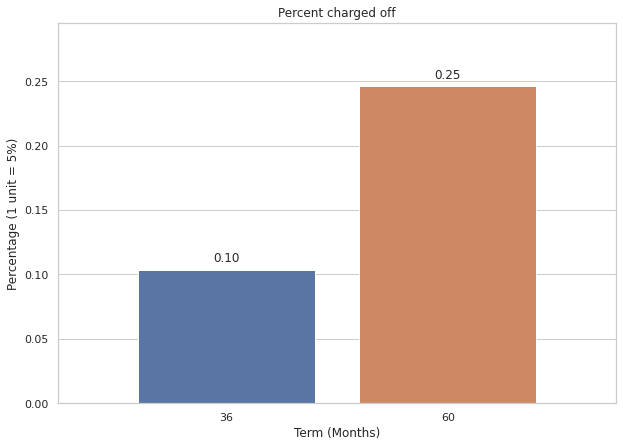

In [194]:
plt.figure(figsize=(10,7))
Labels(sns.barplot(x='term',y='loan_status_cat',data=cleaned_loan, ci=None))
plt.xlabel("Term (Months)")
plt.ylabel("Percentage (1 unit = 5%)")
plt.title("Percent charged off")
plt.savefig("Percent charged off.jpg")
plt.show()

From the above plot we can see that the ~25% of customers who were taking loan for a term of 60 months are charged off.

Lets see the percentage share of `loan_status`

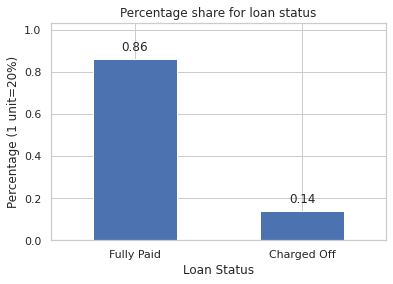

In [195]:
Labels((cleaned_loan.loan_status.value_counts()/len(cleaned_loan.index)).plot.bar())
plt.title("Percentage share for loan status")
plt.xlabel("Loan Status")
plt.ylabel("Percentage (1 unit=20%)")
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("Percentage share for loan status.jpg")
plt.show()

Here we can see the 14% of entire data is charged off.

Lets compare the data on `loan_amnt` and `loan_status`

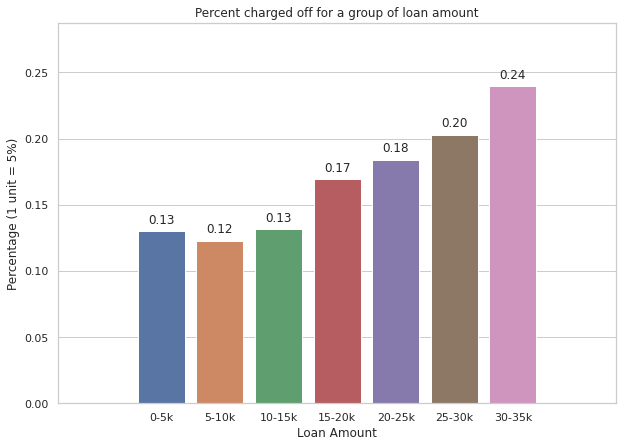

In [196]:
plt.figure(figsize=(10,7))
Labels(sns.barplot(x='loan_amnt_bin',y='loan_status_cat',data=cleaned_loan,ci=None))
plt.xlabel("Loan Amount")
plt.ylabel("Percentage (1 unit = 5%)")
plt.title("Percent charged off for a group of loan amount")
plt.savefig("Percent charged off for a group of loan amount.jpg")
plt.show()

From the above plot we can observe that the defaulters are directly proportional to the loan amount taken ie., if the amount taken by the customer is more, its more likely to charged off.

In [197]:
cleaned_loan.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,loan_status_cat
count,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,3.536700e+04,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.00000,35367.000000,35367.000000,35367.000000,35367.000000
mean,11133.071790,42.100602,11.983468,324.043982,4.983544,6.909599e+04,13.403961,0.146323,0.866995,9.332004,0.054147,13367.676733,49.139015,22.209206,12020.407386,11544.554967,9766.376425,2157.070677,1.306105,95.654256,12.029025,2813.59290,0.041677,6.899511,1996.815987,0.139763
std,7326.233093,10.449890,3.702512,207.149088,3.537027,6.396705e+04,6.636540,0.493060,1.064434,4.374975,0.235734,15678.460397,28.228038,11.403045,8817.192499,8671.919254,6998.669475,2410.568245,7.090090,692.056592,142.972967,4521.49033,0.200560,3.541359,6.568232,0.346746
min,500.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.01000,0.000000,1.000000,1946.000000,0.000000
25%,5500.000000,36.000000,8.940000,167.840000,2.000000,4.150000e+04,8.320000,0.000000,0.000000,6.000000,0.000000,3782.000000,25.900000,14.000000,5602.510000,5321.415000,4750.000000,662.235000,0.000000,0.000000,0.000000,224.78500,0.000000,4.000000,1994.000000,0.000000
50%,10000.000000,36.000000,11.830000,280.620000,4.000000,6.000000e+04,13.500000,0.000000,1.000000,9.000000,0.000000,8934.000000,49.700000,21.000000,9865.710000,9395.310000,8000.000000,1331.960000,0.000000,0.000000,0.000000,602.58000,0.000000,7.000000,1998.000000,0.000000
75%,15000.000000,60.000000,14.460000,426.640000,9.000000,8.250000e+04,18.640000,0.000000,1.000000,12.000000,0.000000,17064.500000,72.600000,29.000000,16300.485000,15619.810000,13500.000000,2722.910000,0.000000,0.000000,0.000000,3604.44500,0.000000,10.000000,2001.000000,0.000000
max,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.20000,2.000000,12.000000,2008.000000,1.000000


Lets compare the data between different `grade` with `int_rate`

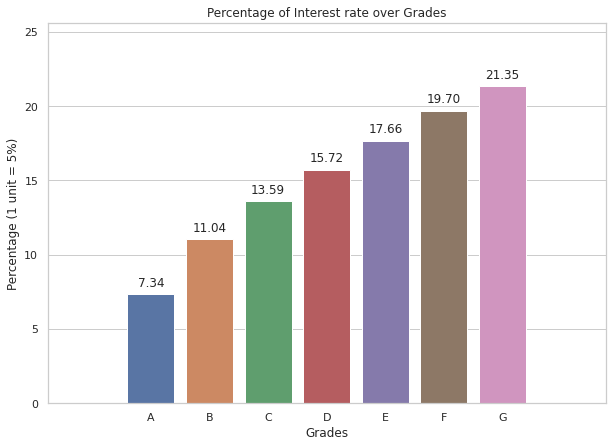

In [198]:
plt.figure(figsize=(10,7))
Labels(sns.barplot(x='grade',y='int_rate',data=cleaned_loan, order=['A','B','C','D','E','F','G'], ci=None))
plt.xlabel("Grades")
plt.ylabel("Percentage (1 unit = 5%)")
plt.title("Percentage of Interest rate over Grades")
plt.savefig("Percentage of Interest rate over Grades")
plt.show()

From the above plot we can see the `interest rate` is incresing as the `grade` of the loan getting risky.

Lets do the same with `grade` and `loan_status` to see the charged off in each grade

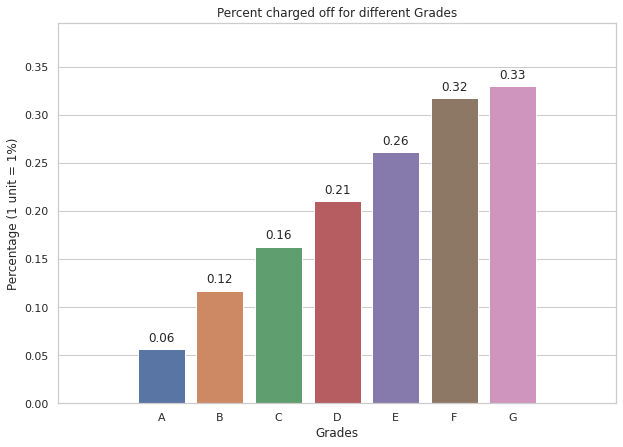

In [199]:
plt.figure(figsize=(10,7))
Labels(sns.barplot(x='grade',y='loan_status_cat',data=cleaned_loan, order=['A','B','C','D','E','F','G'],ci=None))
plt.xlabel("Grades")
plt.ylabel("Percentage (1 unit = 1%)")
plt.title("Percent charged off for different Grades")
plt.savefig("Percent charged off for different Grades.jpg")
plt.show()

From the above plot we see that the average ***charged off*** value is incresing with the ***grade*** of the customer.

We can also do the same plotting for each `sub_grade`.

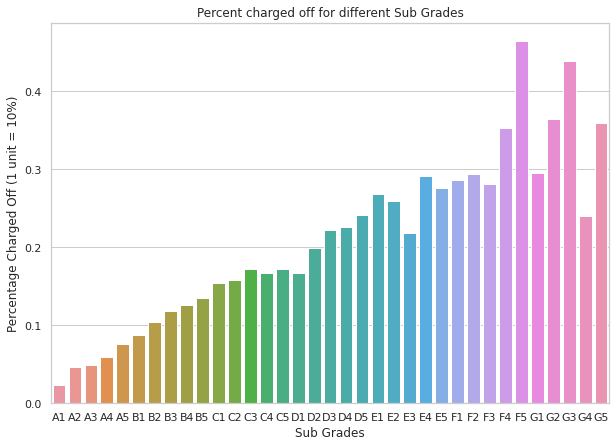

In [200]:
plt.figure(figsize=(10,7))
sns.barplot(x='sub_grade',y='loan_status_cat',data=cleaned_loan, ci=None,
            order=['A1','A2','A3','A4','A5',
                   'B1','B2','B3','B4','B5',
                   'C1','C2','C3','C4','C5',
                   'D1','D2','D3','D4','D5',
                   'E1','E2','E3','E4','E5',
                   'F1','F2','F3','F4','F5',
                   'G1','G2','G3','G4','G5'])
plt.xlabel("Sub Grades")
plt.ylabel("Percentage Charged Off (1 unit = 10%)")
plt.title("Percent charged off for different Sub Grades")
plt.savefig("Percent charged off for different subGrades.jpg")
plt.show()

From the above 2 plots we can see the grade and sub grade, the charged off value is gradually incresing. So, we can say that `Grade` and `Sub_grade` are one of the important factors to identify risky applicants.

Lets see the how `int_rate` effects the `loan_status` for different categories of `home_ownership`

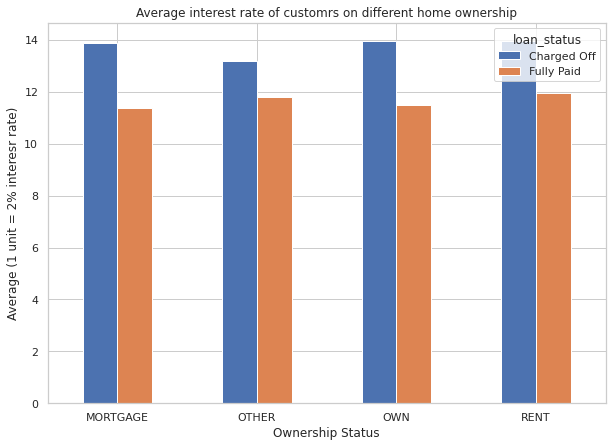

In [201]:
pd.pivot_table(data= cleaned_loan,
               values="int_rate",
               index="home_ownership",
               columns="loan_status",
               aggfunc=np.mean).plot(kind="bar", figsize=[10,7])
plt.xlabel("Ownership Status")
plt.ylabel("Average (1 unit = 2% interesr rate)")
plt.xticks(rotation=360)
plt.title("Average interest rate of customrs on different home ownership")
plt.savefig("Average interest rate of customrs on different home ownership.jpg")
plt.show()

In this plot we can see that the average `int_rate` on all the categories of `home_ownership`, the `charged off` values is higher than the `Fully Paid`.

Lets see the how `int_rate` effects the loan_status for different categories of `loan_amnt`

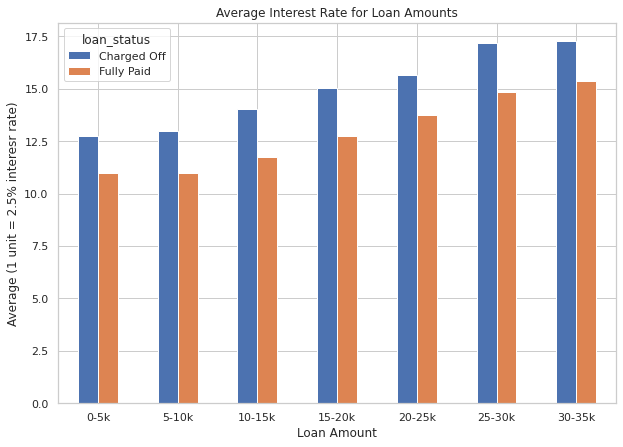

In [202]:
tab_pivotTable=pd.pivot_table(data= cleaned_loan,
               values="int_rate",
               index="loan_amnt_bin",
               columns="loan_status",
               aggfunc=np.mean).plot(kind="bar", figsize=[10,7])
plt.xlabel("Loan Amount")
plt.ylabel("Average (1 unit = 2.5% interesr rate)")
plt.xticks(rotation=360)
plt.title("Average Interest Rate for Loan Amounts")
plt.savefig("Average Interest Rate for Loan Amounts.jpg")
plt.show()

We can see that as the loan amount increases, the intrest also increases and thus the number of people charged off also increases. 

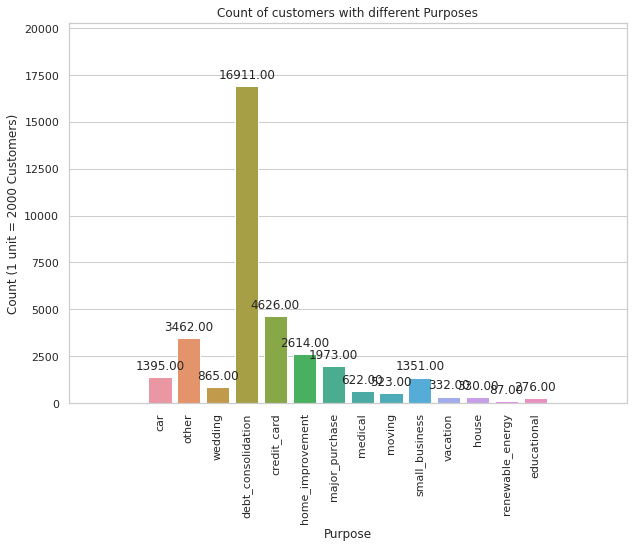

In [203]:
plt.figure(figsize=(10,7))
Labels(sns.countplot(data=cleaned_loan, x="purpose",))
plt.xlabel("Purpose")
plt.ylabel("Count (1 unit = 2000 Customers)")
plt.title("Count of customers with different Purposes")
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()


here we see that most f the customers are taking loan for `debt_consolidation` folowed by `credit_card` and `others` category

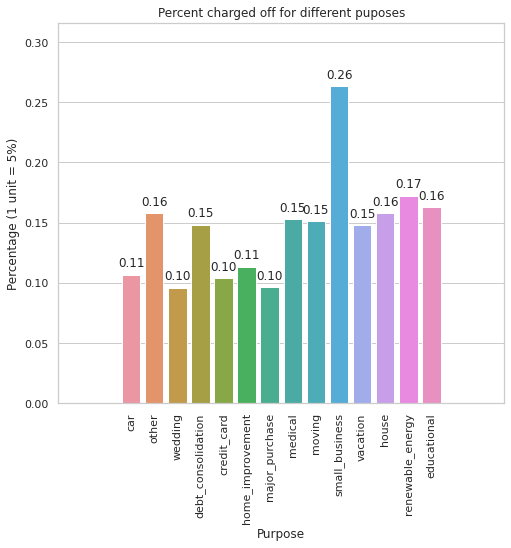

In [204]:
plt.figure(figsize=(8,7))
Labels(
    sns.barplot(x='purpose',y='loan_status_cat',data=cleaned_loan,ci=None))
plt.xlabel("Purpose")
plt.ylabel("Percentage (1 unit = 5%)")
plt.title("Percent charged off for different puposes")
plt.xticks(rotation=90)
plt.savefig("Percent charged off for different purposes.jpg")
plt.show()

#### From the above plot, we can see that the 

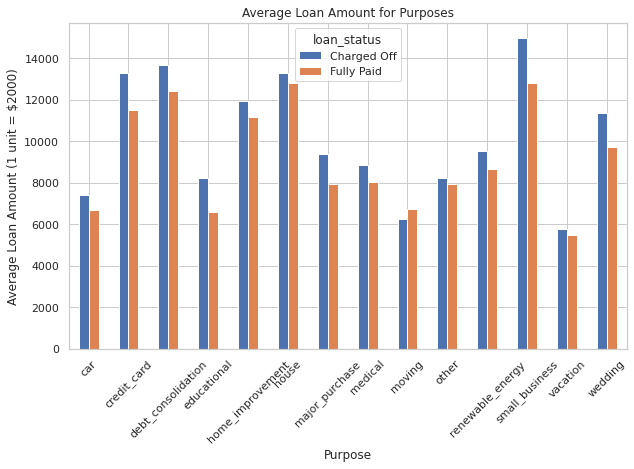

In [205]:
pd.pivot_table(data= cleaned_loan,
               values="loan_amnt",
               index="purpose",
               columns="loan_status",
               aggfunc=np.mean).plot(kind="bar", figsize=[10,6])
plt.xlabel("Purpose")
plt.ylabel("Average Loan Amount (1 unit = $2000)")
plt.title("Average Loan Amount for Purposes")
plt.xticks(rotation=45, horizontalalignment="center")
plt.savefig("Average Loan Amount for Purposes.jpg")
plt.show()

In this plot we can see that the average `loan_amnt` in all the `purpose`, the `charged off` values is higher than the `Fully Paid` excpet `moving` category

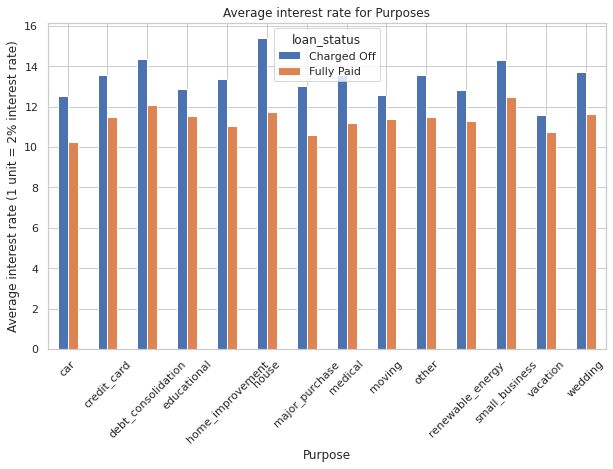

In [206]:
pd.pivot_table(data= cleaned_loan,
               values="int_rate",
               index="purpose",
               columns="loan_status",
               aggfunc=np.mean).plot(kind="bar", figsize=[10,6])
plt.xlabel("Purpose")
plt.ylabel("Average interest rate (1 unit = 2% interest rate)")
plt.title("Average interest rate for Purposes")
plt.xticks(rotation=45, horizontalalignment="center")
plt.savefig("Average interest rate for Purposes.jpg")
plt.show()

From the above plot we can see that if the average `int_rate` is high for any given purpose, then the customers are more likely to be `charged off`

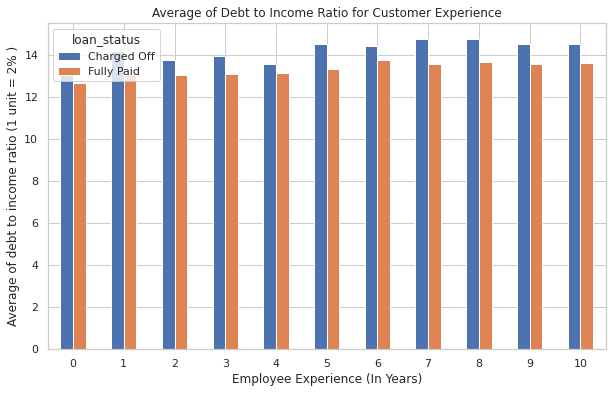

In [207]:
#Need to drop
pd.pivot_table(data= cleaned_loan,
               values="dti",
               index="emp_length",
               columns="loan_status",
               aggfunc=np.mean).plot(kind="bar", figsize=[10,6])
plt.xlabel("Employee Experience (In Years)")
plt.ylabel("Average of debt to income ratio (1 unit = 2% )")
plt.xticks(rotation=0)
plt.title("Average of Debt to Income Ratio for Customer Experience")
plt.savefig("Average interest rate for Purposes.jpg")
plt.show()

#### Here we see that `total_pymnt`,`total_pymnt_inv`,`total_rec_prncp`,`total_rec_int` are hightly correlated to each other but at the same time, we will get these values once the customer start paying the EMI. The aim of this analysis is to identify the fctors of potential defaulters. So, we can drop off these columns.
#### We can also drop off total_rec_late_fee,recoveries,collection_recovery_fee,'last_pymnt_amnt'

In [220]:
drop_columnlist = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee']
cleaned_loan = cleaned_loan.drop(drop_columnlist,axis=1)

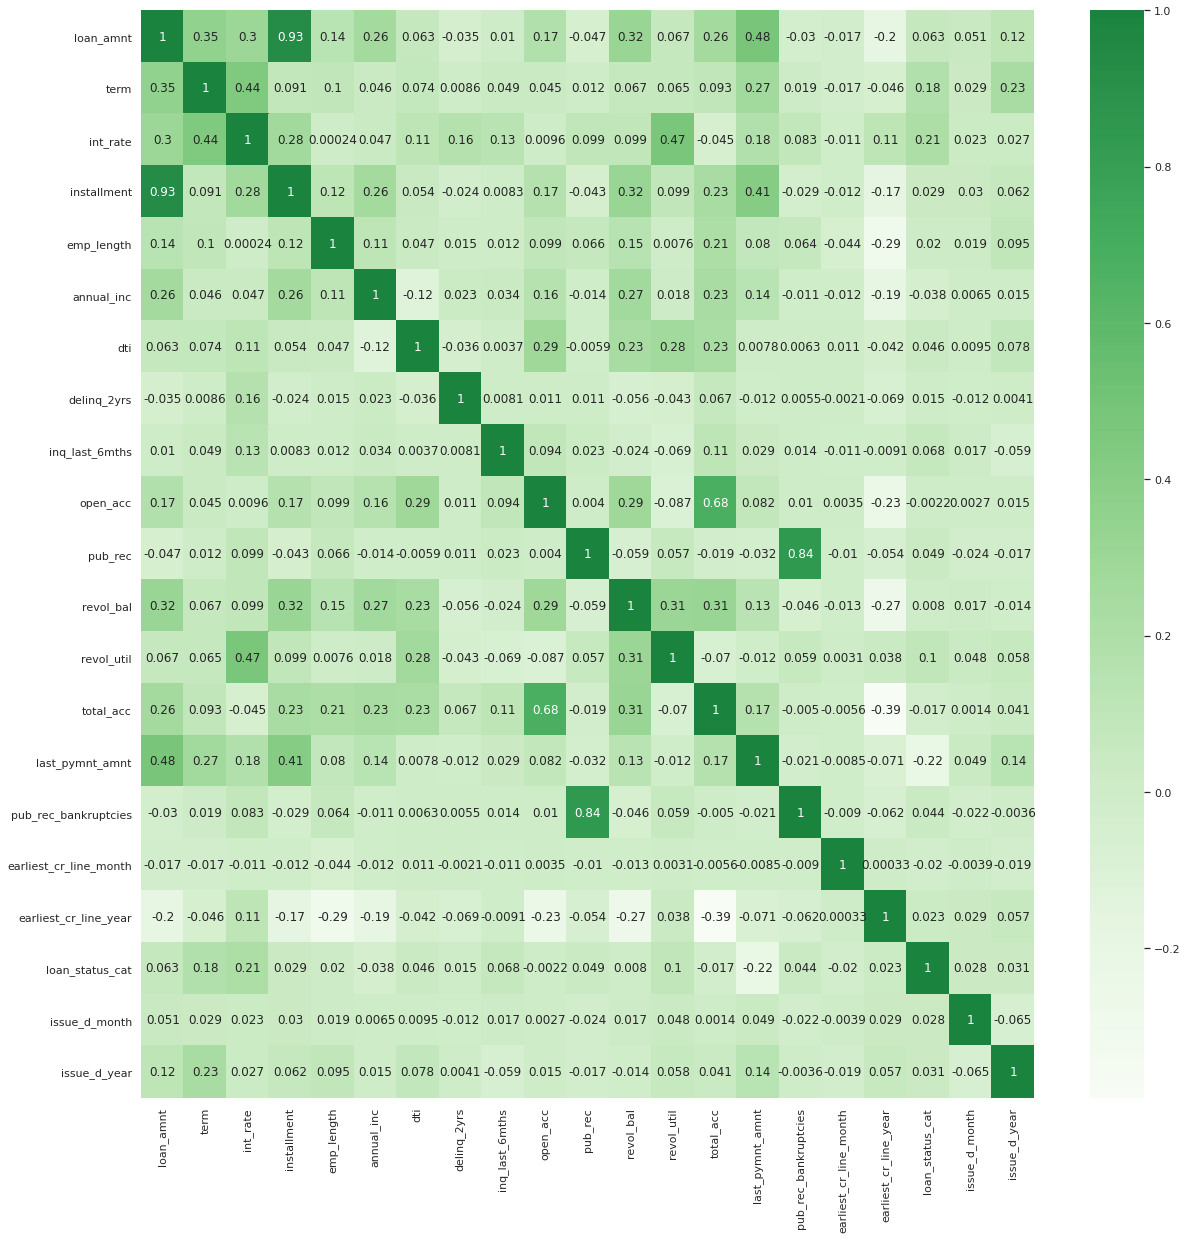

In [221]:
plt.figure(figsize=(20,20))
sns.heatmap(cleaned_loan.corr(),cmap='Greens',annot=True,center=0.5)
plt.show()

In [209]:
cleaned_loan['issue_d_month'] = cleaned_loan['issue_d'].dt.month
cleaned_loan['issue_d_year'] = cleaned_loan['issue_d'].dt.year

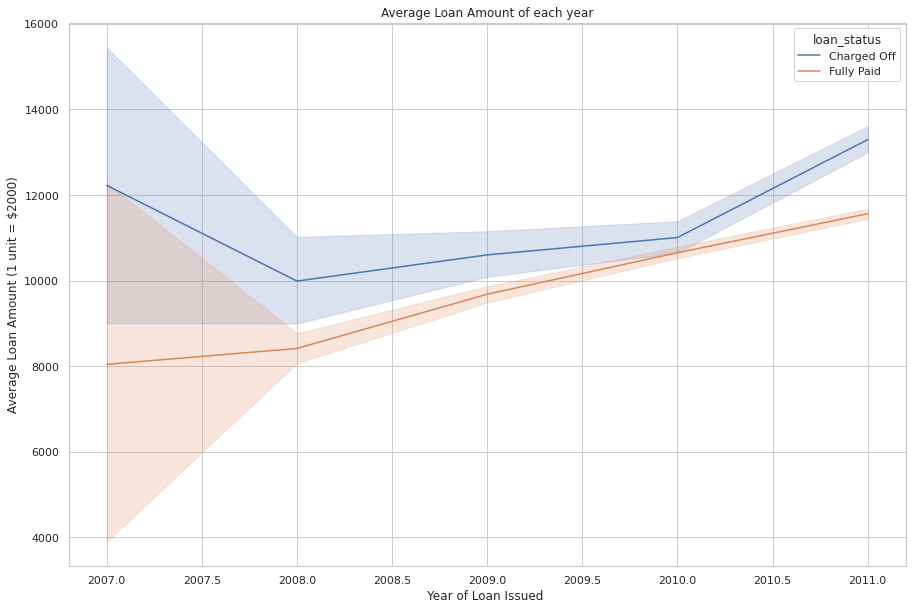

In [210]:
#Need to drop
plt.figure(figsize=(15,10))
sns.lineplot(x=cleaned_loan.issue_d_year, y=cleaned_loan.loan_amnt,hue=cleaned_loan.loan_status)
plt.xlabel("Year of Loan Issued ")
plt.ylabel("Average Loan Amount (1 unit = $2000)")
plt.title("Average Loan Amount of each year")
plt.show()

#### From the above plot we can see that there is a sudden drop from 2007-2008 due to global economic crisis.

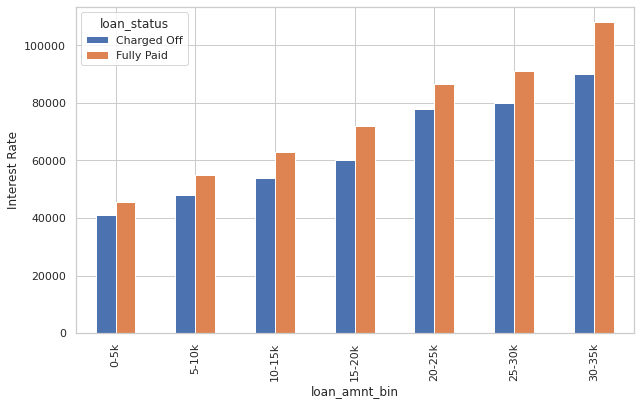

In [211]:
pd.pivot_table(data= cleaned_loan,
               values="annual_inc",
               index="loan_amnt_bin",
               columns="loan_status",
               aggfunc=np.median).plot(kind="bar", figsize=[10,6])
plt.ylabel("Interest Rate")
plt.show()

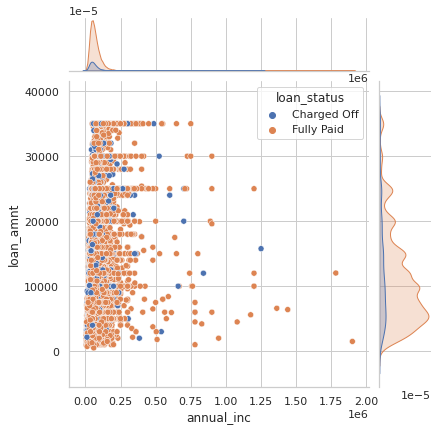

In [222]:
sns.jointplot(data=cleaned_loan[cleaned_loan.annual_inc<3000000],x='annual_inc',y='loan_amnt',hue='loan_status')
plt.show()


#### From the above table we can see that the `annual_inc` is at 0 to 25k, but they have issued a loan amount of 25k and above. So, these will be risky loan amounts.

In [213]:
def bins_annual_inc(x):
  if x<20000:
    return "0-20K"
  elif x<40000:
    return "20k-40k"
  elif x<60000:
    return "40k-60k"
  elif x<80000:
    return "60k-80k"
  elif x<100000:
    return "80k-100k"
  else:
    return "100k<"

In [214]:
cleaned_loan["annual_inc_bin"] = cleaned_loan.annual_inc.apply(lambda x: bins_annual_inc(x))

In [215]:
cleaned_loan.annual_inc_bin.value_counts()

40k-60k     9903
60k-80k     7897
20k-40k     6927
100k<       5464
80k-100k    4396
0-20K        780
Name: annual_inc_bin, dtype: int64

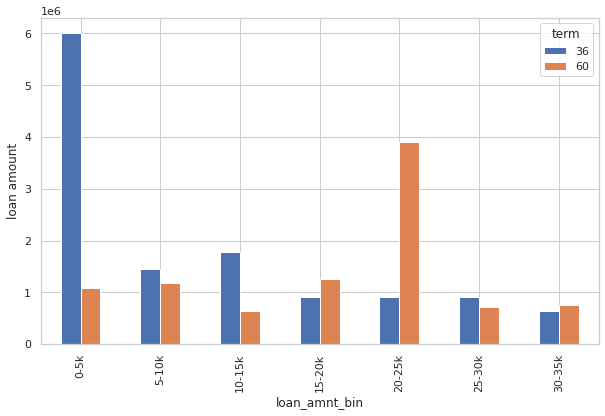

In [216]:
pd.pivot_table(data= cleaned_loan,
               values="annual_inc",
               index="loan_amnt_bin",
               columns="term",
               aggfunc=np.max).plot(kind="bar", figsize=[10,6])
plt.ylabel("loan amount")
plt.show()

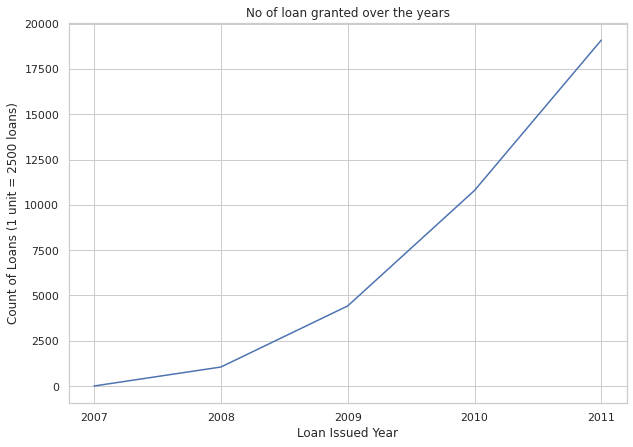

In [217]:
plt.figure(figsize=(10,7))
pl = cleaned_loan.groupby('issue_d_year')['loan_status'].count()
pl.plot.line(x_compat=True)
plt.xticks(np.arange(min(pl.index), max(pl.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issued Year')
plt.ylabel('Count of Loans (1 unit = 2500 loans)')
plt.show()

#### From the above plot we can see that the `Loans Issued` are incresing gradually over the year.

In [218]:
cleaned_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

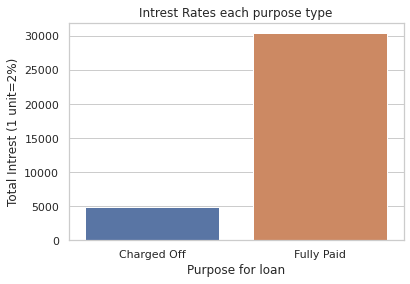

In [219]:
sns.countplot(data=cleaned_loan,x='loan_status')
plt.title("Intrest Rates each purpose type")
plt.xlabel("Purpose for loan")
plt.ylabel("Total Intrest (1 unit=2%)")
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()